## ROWxCOLUMNS Stress test

Stress test with increased rows and columns
12.04.19

#### nais configs:

replicas:

    min: 1
    max: 1

resources:

    limits:
  
        cpu: 1500m
        memory: 4800Mi
    
    requests:
  
        cpu: 200m
        memory: 512Mi

In [33]:
from pyaaas.models.dataset import Dataset
from pyaaas.aaas import AaaS
from pyaaas.models.attribute_type import AttributeType
import pandas as pd
from scripts.data.test_data import generate_dataset
from scripts.data_size_stress_test import dataset_window_analyze_stress_test
import timeit
import requests

In [ ]:
url = "ADD URL HERE"

In [2]:
s  = requests.Session()
s.verify = False
con = AaaS(url, client=s)

### Dataset example

In [36]:
ds = generate_dataset(10,8)
ds.to_dataframe()

,name42,age35,gender29,location24,name43,age36,gender30,location25
0,vtvkzewqgt,21,male,Miami,iceglyzyeu,80,female,London
1,ucfbturvpq,67,male,Oslo,nxctvwqhoj,79,male,Bergen
2,ldsrfybaai,78,female,London,zvnnpywesx,22,female,London
3,dytjgeyzdc,81,male,Tokyo,xugsuyqrme,16,female,Moscow
4,ptjkbfpria,40,male,Bergen,epvqcyedli,65,male,Miami
5,kpmgvyyceg,95,female,Miami,nheehiuyaf,99,female,Bergen
6,yjqhsdsgqm,78,female,Tokyo,szuohqxmyv,72,female,Tokyo
7,qykoujzcsv,57,male,Bergen,cywhpviqrr,23,female,Tokyo
8,bttfvkssnz,84,female,Bejing,xwosuqlpys,82,male,Tokyo
9,eoiqvrwitg,22,male,Miami,xihjismxqp,11,female,Bergen


In [3]:
shapes = [(n, int(n*0.00001)+1) for n in range(50000, 1050000, 50000)]
shapes

[(50000, 1),
 (100000, 2),
 (150000, 2),
 (200000, 3),
 (250000, 3),
 (300000, 4),
 (350000, 4),
 (400000, 5),
 (450000, 5),
 (500000, 6),
 (550000, 6),
 (600000, 7),
 (650000, 7),
 (700000, 8),
 (750000, 8),
 (800000, 9),
 (850000, 9),
 (900000, 10),
 (950000, 10),
 (1000000, 11)]

In [4]:
result_dict = {}
for result in dataset_window_analyze_stress_test(shapes=shapes, connector=con):
    result_dict.update(result)

/home/H153869/PycharmProjects/pyarxaas-workshop/venv/lib/python3.7/site-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/home/H153869/PycharmProjects/pyarxaas-workshop/venv/lib/python3.7/site-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/home/H153869/PycharmProjects/pyarxaas-workshop/venv/lib/python3.7/site-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning

In [27]:
row_column_dict = {rowxcol:value[0] for rowxcol, value in result_dict.items()}

In [28]:
result_df = pd.DataFrame.from_dict(row_column_dict, orient="index", columns=["response_time"])

Text(0, 0.5, 'seconds')

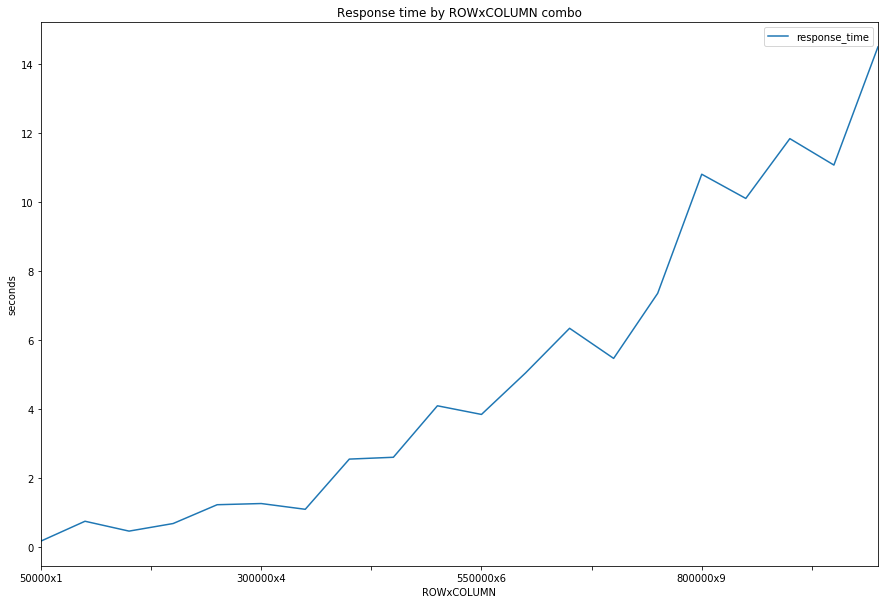

In [38]:
ax = result_df.plot(figsize=(15,10), title="Response time by ROWxCOLUMN combo")
ax.set_xlabel("ROWxCOLUMN")
ax.set_ylabel("seconds")

In [30]:
mb_size_dict = {(value[1] * 10**-6):value[0] for rowxcol, value in result_dict.items()}

In [31]:
mb_df = pd.DataFrame.from_dict(mb_size_dict, orient="index", columns=["response_time"])
mb_df.head()

,response_time
0.838946,0.179074
1.991252,0.754113
3.042144,0.468258
5.292885,0.687887
6.645196,1.232982


Text(0, 0.5, 'seconds')

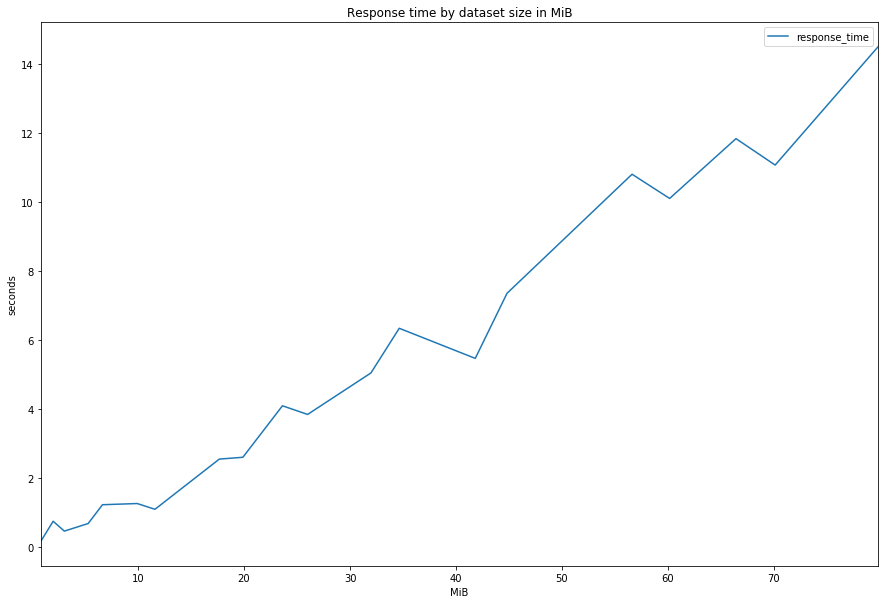

In [37]:
ax = mb_df.plot(figsize=(15,10), title="Response time by dataset size in MiB");
ax.set_xlabel("MiB")
ax.set_ylabel("seconds")